<a href="https://colab.research.google.com/github/DDR7707/Kaggle-Projects/blob/main/Kaggle%20Bulldozer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("TrainAndValid.csv" , parse_dates = ["saledate"] , low_memory = False)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43308 entries, 0 to 43307
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   43308 non-null  int64         
 1   SalePrice                 43308 non-null  int64         
 2   MachineID                 43308 non-null  int64         
 3   ModelID                   43308 non-null  int64         
 4   datasource                43308 non-null  int64         
 5   auctioneerID              43308 non-null  int64         
 6   YearMade                  43308 non-null  int64         
 7   MachineHoursCurrentMeter  24928 non-null  float64       
 8   UsageBand                 22002 non-null  object        
 9   saledate                  43308 non-null  datetime64[ns]
 10  fiModelDesc               43308 non-null  object        
 11  fiBaseModel               43308 non-null  object        
 12  fiSecondaryDesc   

In [ ]:
df["saleYear"] = df["saledate"].dt.year
df["saleMonth"] = df["saledate"].dt.month
df["saleDay"] = df["saledate"].dt.day
df["saleWeek"] = df["saledate"].dt.weekday
df["saleDayofyear"] = df["saledate"].dt.dayofyear

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43308 entries, 0 to 43307
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   43308 non-null  int64         
 1   SalePrice                 43308 non-null  int64         
 2   MachineID                 43308 non-null  int64         
 3   ModelID                   43308 non-null  int64         
 4   datasource                43308 non-null  int64         
 5   auctioneerID              43308 non-null  int64         
 6   YearMade                  43308 non-null  int64         
 7   MachineHoursCurrentMeter  24928 non-null  float64       
 8   UsageBand                 22002 non-null  object        
 9   saledate                  43308 non-null  datetime64[ns]
 10  fiModelDesc               43308 non-null  object        
 11  fiBaseModel               43308 non-null  object        
 12  fiSecondaryDesc   

In [ ]:
df.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleDay,saleWeek,saleDayofyear
count,4.330800e+04,43308.000000,4.330800e+04,43308.000000,43308.000000,43308.000000,43308.000000,24928.000000,43308.000000,43308.000000,43308.000000,43308.000000,43308.000000
mean,1.219162e+06,26728.910132,1.054412e+06,6883.480558,125.910732,5.635241,1865.261176,4577.775273,2004.405606,6.640921,16.629399,2.912256,187.568602
std,4.772571e+04,21788.948164,3.426875e+05,6293.278358,5.468405,13.425493,336.208633,5971.495183,6.135298,3.379831,8.459488,1.071018,101.803697
min,1.139246e+06,4750.000000,3.230000e+02,28.000000,121.000000,1.000000,1000.000000,0.000000,1989.000000,1.000000,1.000000,0.000000,2.000000
25%,1.175029e+06,12000.000000,1.011718e+06,3170.000000,121.000000,2.000000,1985.000000,947.000000,2000.000000,4.000000,10.000000,3.000000,96.000000
50%,1.214083e+06,18500.000000,1.058372e+06,3893.000000,121.000000,3.000000,1996.000000,2618.500000,2006.000000,6.000000,17.000000,3.000000,178.000000
75%,1.265659e+06,34000.000000,1.279537e+06,7001.250000,132.000000,3.000000,2003.000000,6321.250000,2009.000000,10.000000,24.000000,3.000000,274.000000
max,1.284162e+06,142000.000000,1.558285e+06,37198.000000,132.000000,99.000000,2010.000000,220893.000000,2011.000000,12.000000,31.000000,6.000000,365.000000


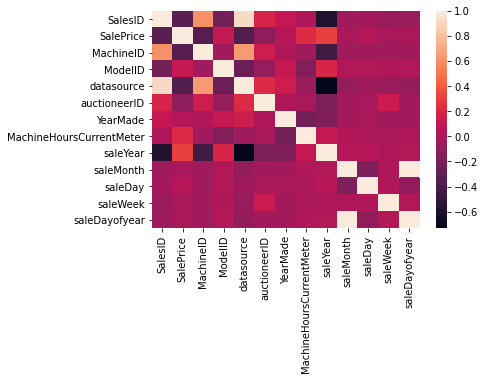

In [ ]:
sns.heatmap(df.corr());

In [ ]:
df.drop(["saledate" , "saleDayofyear"],axis=1,inplace=True)

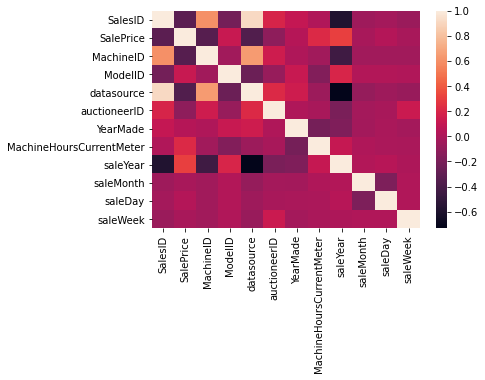

In [ ]:
sns.heatmap(df.corr());

In [ ]:
df.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    18380
UsageBand                   21306
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc             15470
fiModelSeries               39485
fiModelDescriptor           36527
ProductSize                 28525
fiProductClassDesc              0
state                           1
ProductGroup                    1
ProductGroupDesc                1
Drive_System                29012
Enclosure                      19
Forks                       15020
Pad_Type                    30508
Ride_Control                23994
Stick                       30508
Transmission                23726
Turbocharged                30508
Blade_Extension             41815
Blade_Width                 41815
Enclosure_Type

In [ ]:
len(df)

43308

In [ ]:
cats = df.select_dtypes(include="object").columns
cats

Index(['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [ ]:
ints = df.select_dtypes(exclude="object").columns
ints

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'saleYear',
       'saleMonth', 'saleDay', 'saleWeek'],
      dtype='object')

In [ ]:
for i in cats:
  print(f"The number of unique values in {i} column is/are : {len(df[i].unique())}")
  print("\n")
  print(f"The unique values in {i} column is/are  : {df[i].unique()}")
  print("\n")
  print(f"The value counts for each value in {i} column is/are :  \n{df[i].value_counts()}")
  print("\n\n")
  print("*"*100)
  print("\n\n")

The number of unique values in UsageBand column is/are : 4


The unique values in UsageBand column is/are  : ['Low' 'High' 'Medium' nan]


The value counts for each value in UsageBand column is/are :  
Medium    10597
Low        7358
High       4047
Name: UsageBand, dtype: int64



****************************************************************************************************



The number of unique values in fiModelDesc column is/are : 2461


The unique values in fiModelDesc column is/are  : ['521D' '950FII' '226' ... 'CK62' '721BXT' '621CXR']


The value counts for each value in fiModelDesc column is/are :  
580K          3362
580           2267
1845C         2113
1840          1376
580C           795
              ... 
XT850            1
R360LC           1
FR9B             1
PC308USLC3       1
EX200-2          1
Name: fiModelDesc, Length: 2461, dtype: int64



****************************************************************************************************



The number of u

In [ ]:
for i in ints:
  print(f"The number of unique values in {i} are {len(df[i].unique())}")
  print("\n")
  print(f"The number of missingvalues in {i} are {df[i].isna().sum()}")
  print("\n")
  print("*"*100)
  print("\n")

The number of unique values in SalesID are 43308


The number of missingvalues in SalesID are 0


****************************************************************************************************


The number of unique values in SalePrice are 470


The number of missingvalues in SalePrice are 0


****************************************************************************************************


The number of unique values in MachineID are 41545


The number of missingvalues in MachineID are 0


****************************************************************************************************


The number of unique values in ModelID are 2529


The number of missingvalues in ModelID are 0


****************************************************************************************************


The number of unique values in datasource are 2


The number of missingvalues in datasource are 0


*******************************************************************************************

In [ ]:
df.drop(["SalesID" , "MachineID" , "fiModelSeries" , "fiModelDescriptor" , "ProductSize" , "Drive_System" , "Pad_Type" , "Stick" , "Turbocharged" , "Blade_Extension" , "Blade_Width" , "Enclosure_Type" , "Engine_Horsepower" , "Pushblock" , "Ripper" , "Scarifier" , "Tip_Control" , "Tire_Size" , "Coupler_System" , "Grouser_Tracks" , "Hydraulics_Flow" , "Track_Type" , "Undercarriage_Pad_Width" , "Stick_Length" , "Thumb" , "Pattern_Changer" , "Grouser_Type" , "Backhoe_Mounting" , "Blade_Type" , "Travel_Controls" , "Differential_Type" , "Steering_Controls"] , axis = 1 , inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43308 entries, 0 to 43307
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SalePrice                 43308 non-null  int64  
 1   ModelID                   43308 non-null  int64  
 2   datasource                43308 non-null  int64  
 3   auctioneerID              43308 non-null  int64  
 4   YearMade                  43308 non-null  int64  
 5   MachineHoursCurrentMeter  24928 non-null  float64
 6   UsageBand                 22002 non-null  object 
 7   fiModelDesc               43308 non-null  object 
 8   fiBaseModel               43308 non-null  object 
 9   fiSecondaryDesc           27838 non-null  object 
 10  fiProductClassDesc        43308 non-null  object 
 11  state                     43307 non-null  object 
 12  ProductGroup              43307 non-null  object 
 13  ProductGroupDesc          43307 non-null  object 
 14  Enclos

In [ ]:
df.isna().sum()

SalePrice                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    18380
UsageBand                       0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc                 0
fiProductClassDesc              0
state                           1
ProductGroup                    1
ProductGroupDesc                1
Enclosure                      19
Forks                       15020
Ride_Control                23994
Transmission                23726
Hydraulics                  12865
Coupler                     19731
saleYear                        0
saleMonth                       0
saleDay                         0
saleWeek                        0
dtype: int64

In [ ]:
cats = df.select_dtypes(include="object").columns
cats

Index(['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Enclosure', 'Forks', 'Ride_Control', 'Transmission', 'Hydraulics',
       'Coupler'],
      dtype='object')

In [ ]:
ints = df.select_dtypes(exclude="object").columns
ints

Index(['SalePrice', 'ModelID', 'datasource', 'auctioneerID', 'YearMade',
       'MachineHoursCurrentMeter', 'saleYear', 'saleMonth', 'saleDay',
       'saleWeek'],
      dtype='object')

In [ ]:
for i in cats:
  if df[i].isna().sum() != 0:
      df[i].fillna(df[i].mode()[0] , inplace = True)

In [ ]:
for i in ints:
  df[i].fillna(df[i].median() , inplace = True)

In [ ]:
df.isna().sum()

SalePrice                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Enclosure                   0
Forks                       0
Ride_Control                0
Transmission                0
Hydraulics                  0
Coupler                     0
saleYear                    0
saleMonth                   0
saleDay                     0
saleWeek                    0
dtype: int64

In [ ]:
df = pd.get_dummies(df , columns = cats , prefix = cats)

In [ ]:
df.head()

,SalePrice,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleDay,saleWeek,UsageBand_High,UsageBand_Low,UsageBand_Medium,fiModelDesc_1080,fiModelDesc_1080B,fiModelDesc_1088,fiModelDesc_1088TTL,fiModelDesc_10C,fiModelDesc_110,fiModelDesc_1105,fiModelDesc_110TLB,fiModelDesc_110Z,fiModelDesc_110Z-2,fiModelDesc_112F,fiModelDesc_1150,fiModelDesc_1150B,fiModelDesc_1150C,fiModelDesc_1150E,fiModelDesc_1150ELT,fiModelDesc_1150G,fiModelDesc_1150GLT,fiModelDesc_1150H,fiModelDesc_1150HLGP,fiModelDesc_1150HLT,fiModelDesc_1150HWT,fiModelDesc_1150K,fiModelDesc_1150KLGPSERIES3,fiModelDesc_115ZIII,fiModelDesc_115ZIV,fiModelDesc_115ZV,...,ProductGroup_TEX,ProductGroup_TTT,ProductGroup_WL,ProductGroupDesc_Backhoe Loaders,ProductGroupDesc_Motor Graders,ProductGroupDesc_Skid Steer Loaders,ProductGroupDesc_Track Excavators,ProductGroupDesc_Track Type Tractors,ProductGroupDesc_Wheel Loader,Enclosure_EROPS,Enclosure_EROPS w AC,Enclosure_OROPS,Forks_None or Unspecified,Forks_Yes,Ride_Control_No,Ride_Control_None or Unspecified,Ride_Control_Yes,Transmission_AutoShift,Transmission_Autoshift,Transmission_Direct Drive,Transmission_Hydrostatic,Transmission_None or Unspecified,Transmission_Powershift,Transmission_Powershuttle,Transmission_Standard,Hydraulics_2 Valve,Hydraulics_3 Valve,Hydraulics_4 Valve,Hydraulics_Auxiliary,Hydraulics_Base + 1 Function,Hydraulics_Base + 2 Function,Hydraulics_Base + 3 Function,Hydraulics_Base + 4 Function,Hydraulics_Base + 5 Function,Hydraulics_Base + 6 Function,Hydraulics_None or Unspecified,Hydraulics_Standard,Coupler_Hydraulic,Coupler_Manual,Coupler_None or Unspecified
0,66000,3157,121,3,2004,68.0,2006,11,16,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,57000,77,121,3,1996,4640.0,2004,3,26,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,10000,7009,121,3,2001,2838.0,2004,2,26,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,38500,332,121,3,2001,3486.0,2011,5,19,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,11000,17311,121,3,2007,722.0,2009,7,23,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = df.drop(["SalePrice"] , axis = 1)
y = df["SalePrice"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.1 , random_state = 42)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(38977, 4331, 38977, 4331)

In [ ]:
ints = ints.to_list()
ints

['SalePrice',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'saleYear',
 'saleMonth',
 'saleDay',
 'saleWeek']

In [ ]:
ints.pop(0)
ints

['ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'saleYear',
 'saleMonth',
 'saleDay',
 'saleWeek']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[ints])
X_train[ints] = scaler.transform(X_train[ints])
X_test[ints] = scaler.transform(X_test[ints])

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()   
linear.fit(X_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
linear.score(X_train , y_train)

0.8622609225314237

In [ ]:
linear.score(X_test , y_test)

-2.5801461875919044e+16

In [ ]:
linear_preds = linear.predict(X_test)
linear_preds

array([38814.8125, 55014.1875,  5335.1875, ..., 12723.4375, 76043.6875,
       56705.8125])

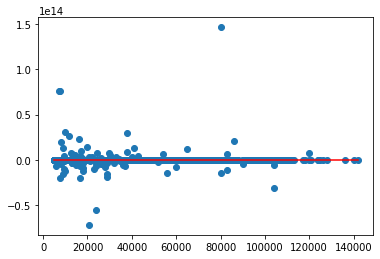

In [ ]:
plt.scatter(y_test , linear_preds)
x = np.linspace(min(y_test),max(y_test),100)
y = x
plt.plot(x, y , "-r");

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random = RandomForestRegressor(random_state = 42)
random.fit(X_train , y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
random.score(X_train , y_train)

0.9848747469557555

In [ ]:
random.score(X_test , y_test)

0.8834742367662002

In [ ]:
random_preds = random.predict(X_test)
random_preds

array([29110. , 39815. ,  6324.5, ..., 10960. , 58805. , 55365. ])

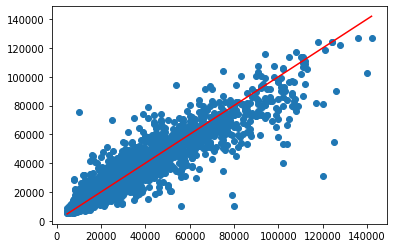

In [ ]:
plt.scatter(y_test , random_preds)
x = np.linspace(min(y_test),max(y_test),100)
y = x
plt.plot(x, y , "-r");

In [ ]:
random.feature_importances_

array([0.03244221, 0.00053297, 0.00200619, ..., 0.00059207, 0.0004126 ,
       0.00070921])

In [ ]:
score = sklearn.metrics.mean_squared_log_error(y_test , random_preds)
score

0.052071370008372926

In [ ]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train , y_train)

[18:44:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
xgb.score(X_train , y_train)

0.7773367884538143

In [ ]:
xgb.score(X_test , y_test)

0.747967544520401

In [ ]:
xgb_preds = xgb.predict(X_test)
xgb_preds

array([29009.441, 43655.96 , 10679.016, ..., 15449.519, 55715.234,
       59360.17 ], dtype=float32)

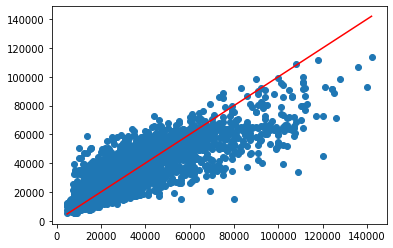

In [ ]:
plt.scatter(y_test , xgb_preds)
x = np.linspace(min(y_test),max(y_test),100)
y = x
plt.plot(x, y , "-r");

In [ ]:
score = sklearn.metrics.mean_squared_log_error(y_test , xgb_preds)
score

0.1280199626465809

## Best model out of above is Randomforest regressor model